In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/Auto.csv')

In [4]:
df.shape

(397, 9)

c. 'mpg' representa o consumo de combustível de um veículo, que é uma medida quantitativa e contínua. É um indicador de eficiência que pode ser influenciado por diversas outras características do carro, como peso, potência, etc., o que  torna ideal para ser a variável a ser prevista em nosso modelo de regressão.

In [9]:
correlation_matrix = df.corr(numeric_only=True)
mpg_correlation = correlation_matrix['mpg'].sort_values(ascending=False)
print(mpg_correlation)

mpg             1.000000
year            0.581469
origin          0.563698
acceleration    0.422297
cylinders      -0.776260
displacement   -0.804443
weight         -0.831739
Name: mpg, dtype: float64


Gráfico 'scatter_plot.png' salvo.


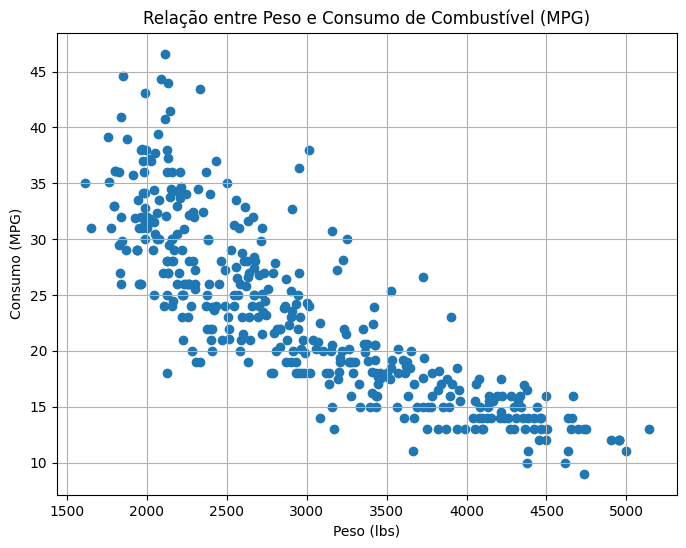

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(df['weight'], df['mpg'])
plt.title('Relação entre Peso e Consumo de Combustível (MPG)')
plt.xlabel('Peso (lbs)')
plt.ylabel('Consumo (MPG)')
plt.grid(True)
plt.savefig('scatter_plot.png')
print("Gráfico 'scatter_plot.png' salvo.")

In [12]:
x = df[['weight']].values
y = df['mpg'].values

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
k_values = range(1,101)
mse_values = []

In [17]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

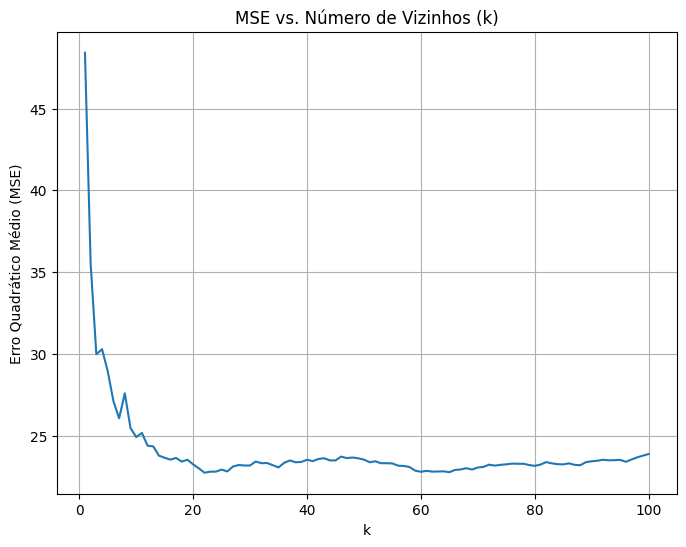

In [20]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, mse_values)
plt.title('MSE vs. Número de Vizinhos (k)')
plt.xlabel('k')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.grid(True)
plt.savefig('mse_vs_k.png')
plt.show()

In [23]:
results_df = pd.DataFrame({
    'k': k_values,
    'MSE': mse_values
})
sorted_results = results_df.sort_values(by='MSE', ascending=False)
print(sorted_results.head(10))

     k        MSE
0    1  48.409625
1    2  35.508875
3    4  30.286695
2    3  29.980778
4    5  28.942965
7    8  27.593398
5    6  27.113417
6    7  26.066258
8    9  25.470412
10  11  25.168112


In [24]:
k_choices = {
    'Ruim (Overfitting)': 1,
    'Melhor Caso': 22,
    'Médio (Underfitting)': 80
}
predictions = {}

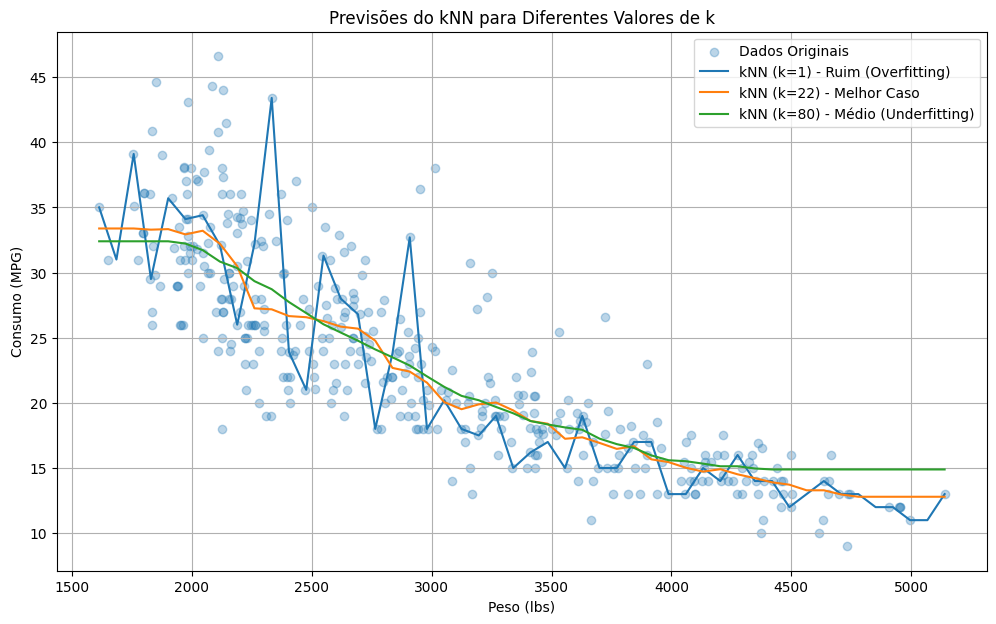

In [35]:
X_range = np.linspace(x.min(), x.max()).reshape(-1, 1)

for name, k in k_choices.items():

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    predictions[name] = knn.predict(X_range)

# Plotando os resultados
plt.figure(figsize=(12, 7))
plt.scatter(x, y, alpha=0.3, label='Dados Originais')

for name, y_pred_range in predictions.items():
    plt.plot(X_range, y_pred_range, label=f'kNN (k={k_choices[name]}) - {name}')

plt.title('Previsões do kNN para Diferentes Valores de k')
plt.xlabel('Peso (lbs)')
plt.ylabel('Consumo (MPG)')
plt.legend()
plt.grid(True)
plt.savefig('knn_predictions_updated.png')

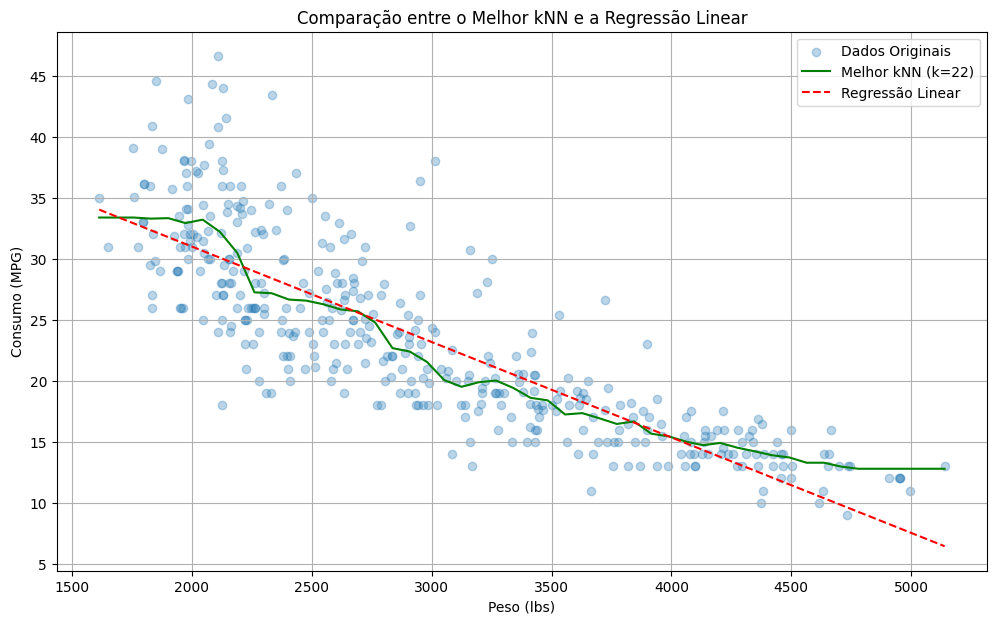

In [34]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(X_range)

plt.figure(figsize=(12, 7))
plt.scatter(x, y, alpha=0.3, label='Dados Originais')

best_knn_predictions = predictions['Melhor Caso']

plt.plot(X_range, best_knn_predictions, label=f'Melhor kNN (k=22)', color='green')
plt.plot(X_range, y_pred_lr, label='Regressão Linear', color='red', linestyle='--')

plt.title('Comparação entre o Melhor kNN e a Regressão Linear')
plt.xlabel('Peso (lbs)')
plt.ylabel('Consumo (MPG)')
plt.legend()
plt.grid(True)
plt.savefig('knn_vs_linear_regression_updated.png')